# Explore here

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [120]:
#download data to csv 
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
pd.read_csv(url).to_csv('../data/raw/AB_NYC_2019.csv', index=False)


In [121]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv', index_col='id')
df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [122]:
df.shape

(48895, 15)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [124]:
#looking for duplicates in the coordinates

duplicated = df.duplicated(['latitude', 'longitude'])
total_duplicates = duplicated.sum()
print(f'There are {total_duplicates} coordinates duplicated, but it does not mean a duplicated room')


There are 24 coordinates duplicated, but it does not mean a duplicated room


In [125]:
#Looking for "fee" apartments
free = df[df['price'] <= 0]
free.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 18750597 to 21304320
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11 non-null     object 
 1   host_id                         11 non-null     int64  
 2   host_name                       11 non-null     object 
 3   neighbourhood_group             11 non-null     object 
 4   neighbourhood                   11 non-null     object 
 5   latitude                        11 non-null     float64
 6   longitude                       11 non-null     float64
 7   room_type                       11 non-null     object 
 8   price                           11 non-null     int64  
 9   minimum_nights                  11 non-null     int64  
 10  number_of_reviews               11 non-null     int64  
 11  last_review                     10 non-null     object 
 12  reviews_per_month             

In [126]:
na = df.isna().sum()
na

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [127]:
#looking for minimun nights outliers

nights_describe = df['minimum_nights'].describe()
nights_describe

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [128]:
#calculate iqr for nights

iqr = nights_describe['75%'] - nights_describe['25%']

upper = nights_describe['75%'] + 1.5 * iqr
lower = nights_describe['25%'] - 1.5 * iqr

print(f'The limits are {round(upper, 2)} and {round(lower, 2)} with a interquartile range of {round(iqr, 2)}')

The limits are 11.0 and -5.0 with a interquartile range of 4.0


In [129]:
df[df['minimum_nights'] > 90]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140
253332,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,13,2018-09-01,0.14,1,204
258690,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,10,2014-10-26,0.12,1,0
263502,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,24,2015-08-19,0.26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331
35892874,3 Bedroom Loft Like Triplex 2.5 Bath with Garden.,269970642,Rita,Manhattan,Harlem,40.80778,-73.94762,Entire home/apt,200,120,0,NaN,NaN,1,365
36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365


In [130]:
#delete irrelevant colums and duplicated
#df = df.drop_duplicates(['latitude', 'longitude'])
df = df.drop(free.index) #delete free rooms

df = df.drop(['name', 'host_name', 'last_review', 'reviews_per_month'], axis=1)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Text(0.5, 1.0, 'Ubications map by neighbourhood')

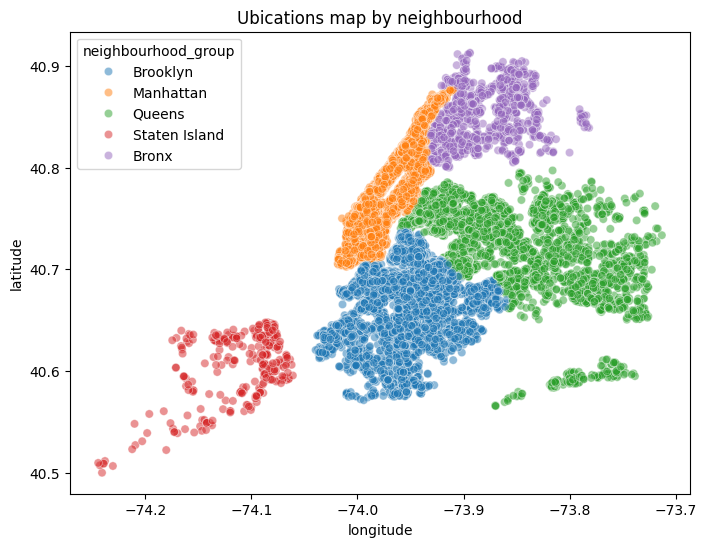

In [131]:
#ubication maps

plt.figure(figsize=(8,6))
sns.scatterplot(x= 'longitude', y= 'latitude', hue= 'neighbourhood_group', data= df, alpha= 0.5)
plt.title('Ubications map by neighbourhood')


With this map we can see the dataset is divided by 5 districts

/tmp/ipykernel_762/666277826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,


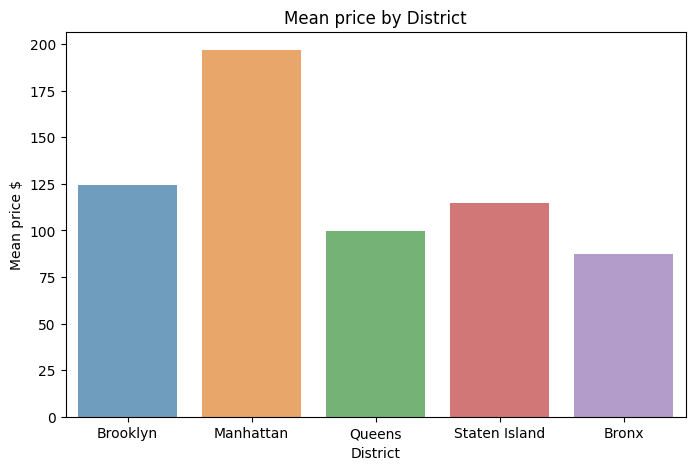

In [132]:
#mean prices by district
groups = df['neighbourhood_group'].unique()

palette = sns.color_palette() 
color_map = dict(zip(groups, palette[:len(groups)]))

plt.figure(figsize=(8,5))
sns.barplot(df, 
            x = 'neighbourhood_group', 
            y= 'price', 
            estimator = 'mean', 
            errorbar=None,
            palette=color_map,
            alpha=0.7)

plt.title('Mean price by District')
plt.xlabel('District')
plt.ylabel('Mean price $')
plt.show()

We can see Manhattan has the highest prices 

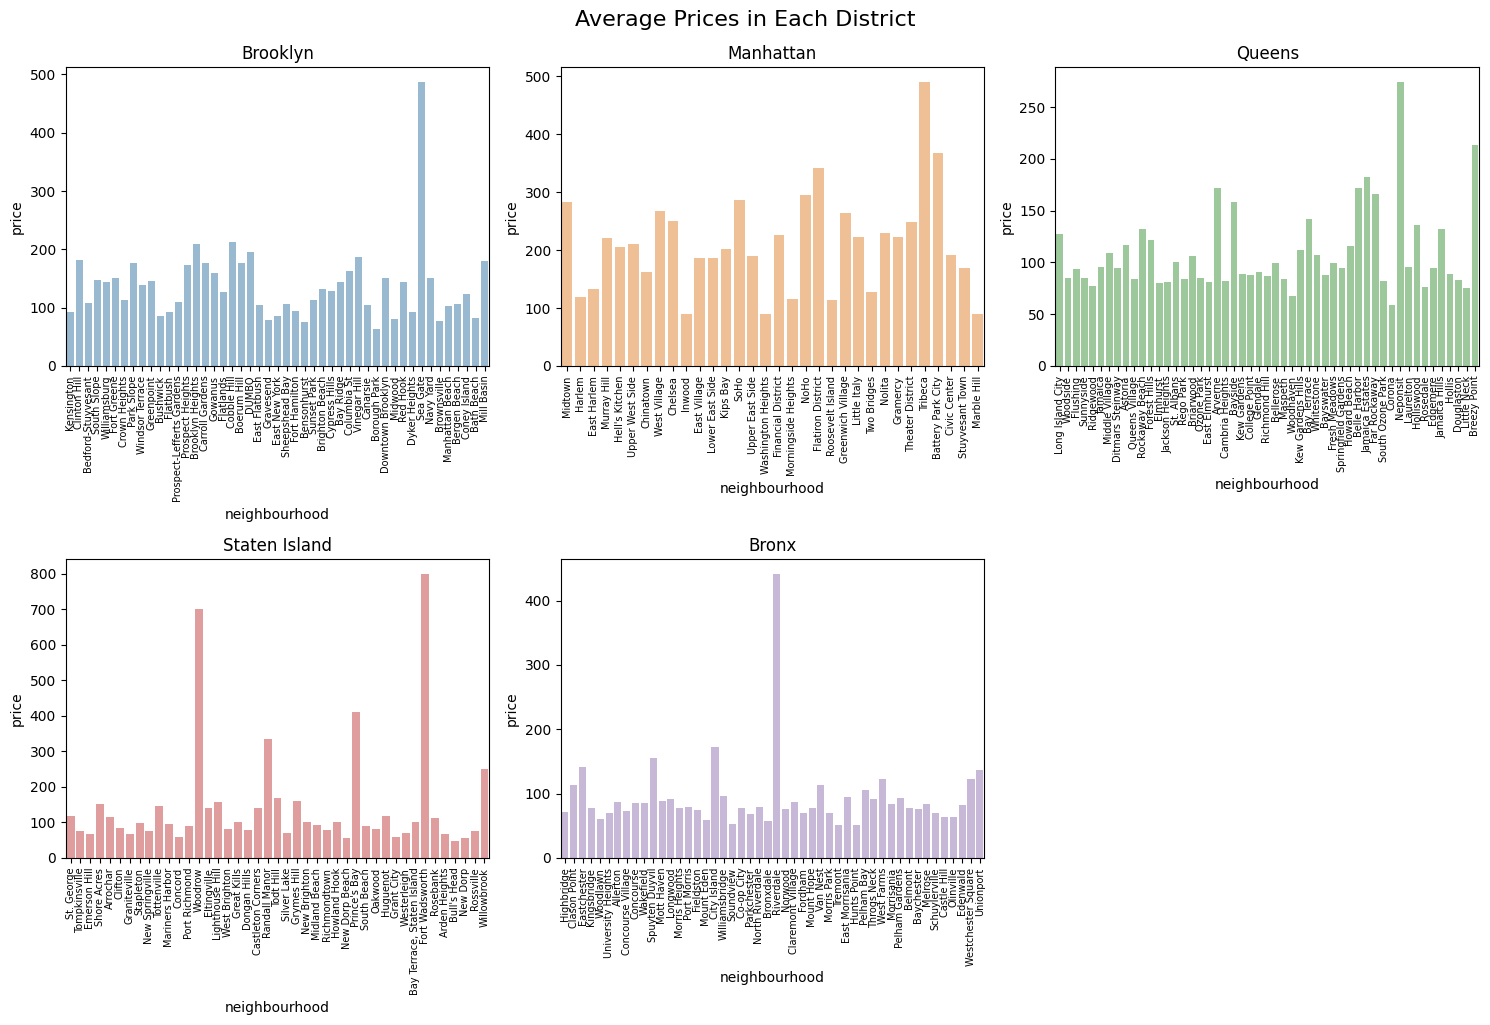

In [133]:
#prices by district
plt.figure(figsize=(15, 10))

for i, group in enumerate(groups, 1):
    subset = df[df['neighbourhood_group'] == group]
    plt.subplot(2, 3, i)
    sns.barplot(
        x='neighbourhood',
        y='price',
        data=subset,
        estimator='mean',
        alpha=0.5,
        errorbar=None,
        color=color_map[group]
    )
    plt.title(group)
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()

plt.suptitle('Average Prices in Each District', fontsize=16, y=1.02)
plt.show()


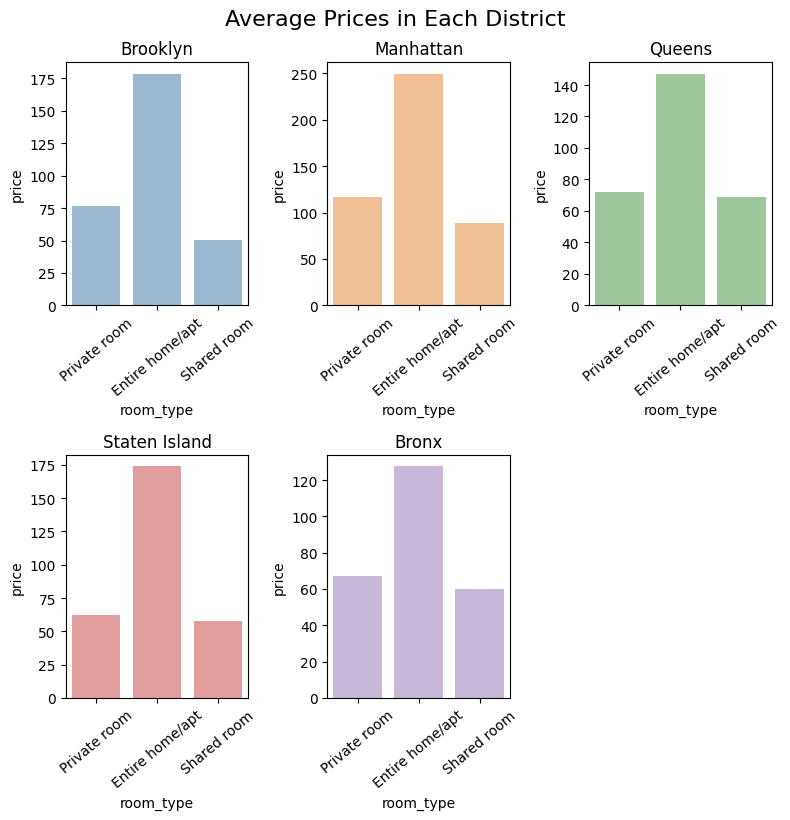

In [134]:
#leets see prices for neigborhood and room type

room_order = df['room_type'].unique()

palette = sns.color_palette() 
color_map = dict(zip(groups, palette[:len(groups)]))

plt.figure(figsize=(8, 8))

for i, group in enumerate(groups, 1):
    subset = df[df['neighbourhood_group'] == group]
    plt.subplot(2, 3, i)
    sns.barplot(
        x='room_type',
        y='price',
        data=subset,
        estimator='mean',
        alpha=0.5,
        errorbar=None,
        color=color_map[group],
        order=room_order
    )
    plt.title(group)
    plt.xticks(rotation=40, fontsize=10)
    plt.tight_layout()

plt.suptitle('Average Prices in Each District', fontsize=16, y=1.02)
plt.show()

We can see in every district the entire home is always the most expensive.

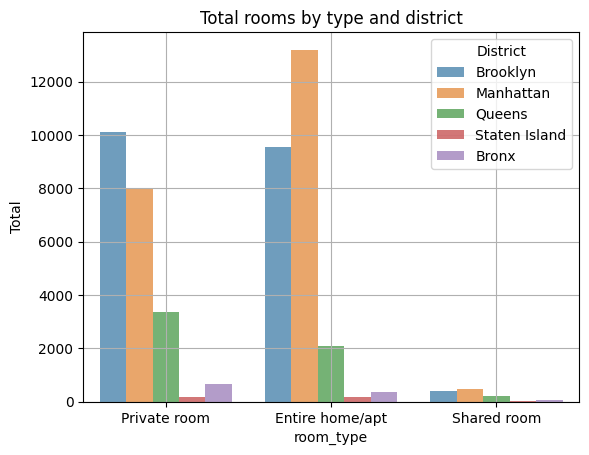

In [135]:
#total rents by room and district

sns.countplot(df, x = 'room_type', hue='neighbourhood_group', alpha = 0.7)
plt.title('Total rooms by type and district')
plt.ylabel('Total')
plt.legend(title = 'District')
plt.grid()
plt.show()

It seems not to be relevant relationship between room type and district

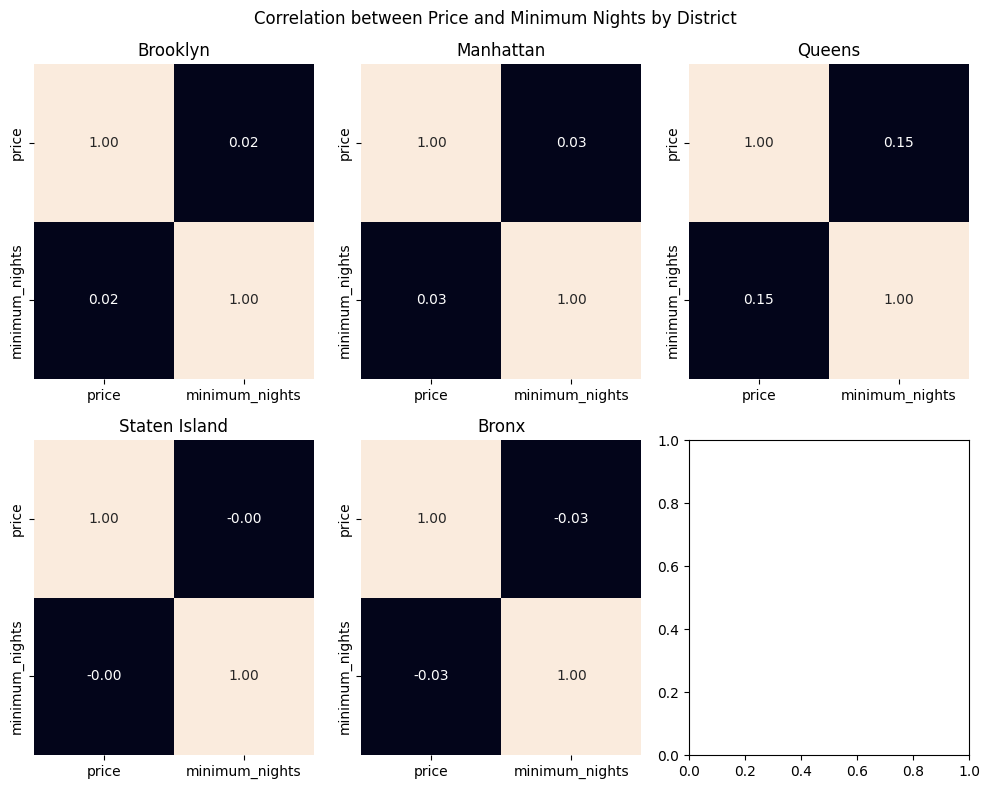

In [136]:
#relation in prices and min nights by district

fig, axis = plt.subplots(2, 3, figsize=(10, 8))
axis = axis.flatten() 

for i, group in enumerate(groups):
    subset = df[df['neighbourhood_group'] == group]
    
    # correlation matrix
    corr = subset[["price", "minimum_nights"]].corr()
    
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cbar=False,
        ax=axis[i],
        
    )
    
    axis[i].set_title(group, fontsize=12)
    axis[i].tick_params(labelsize=10)

fig.suptitle('Correlation between Price and Minimum Nights by District')
plt.tight_layout()
plt.show()


There is no relation between minimun number of nights and the price in any district

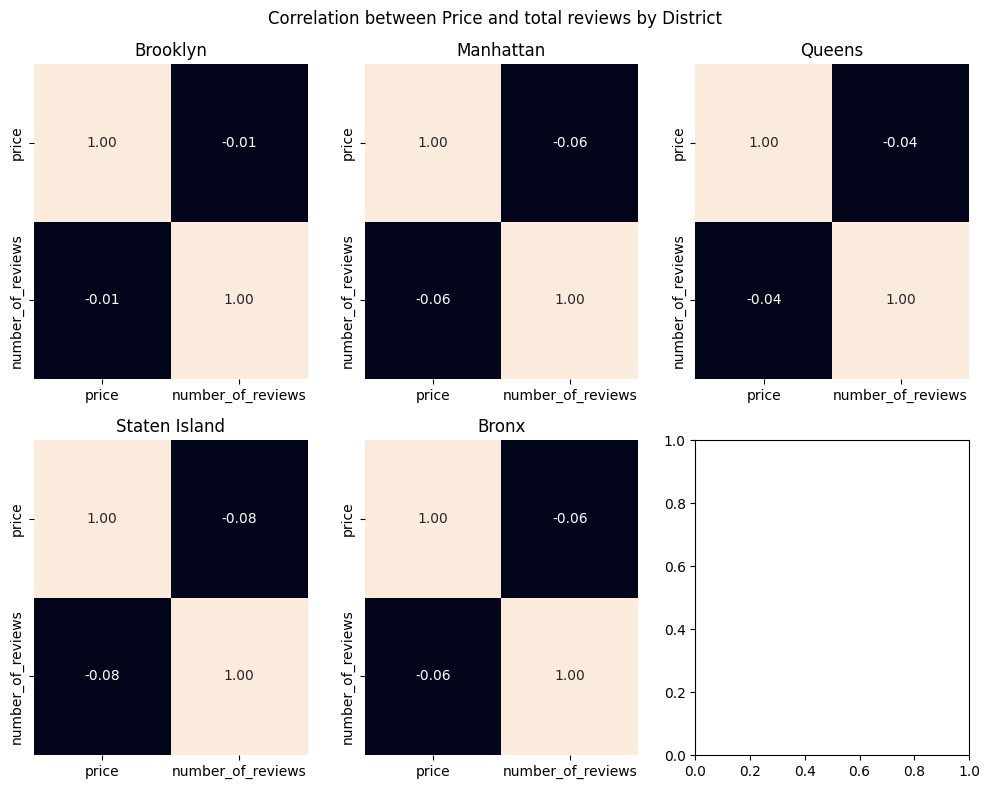

In [137]:
#relation in prices and reviews by district

fig, axis = plt.subplots(2, 3, figsize=(10, 8))
axis = axis.flatten() 

for i, group in enumerate(groups):
    subset = df[df['neighbourhood_group'] == group]
    
    # correlation matrix
    corr = subset[["price", "number_of_reviews"]].corr()
    
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cbar=False,
        ax=axis[i],
        
    )
    
    axis[i].set_title(group, fontsize=12)
    axis[i].tick_params(labelsize=10)

fig.suptitle('Correlation between Price and total reviews by District')
plt.tight_layout()
plt.show()

There is no relation between reviews and the price in any district

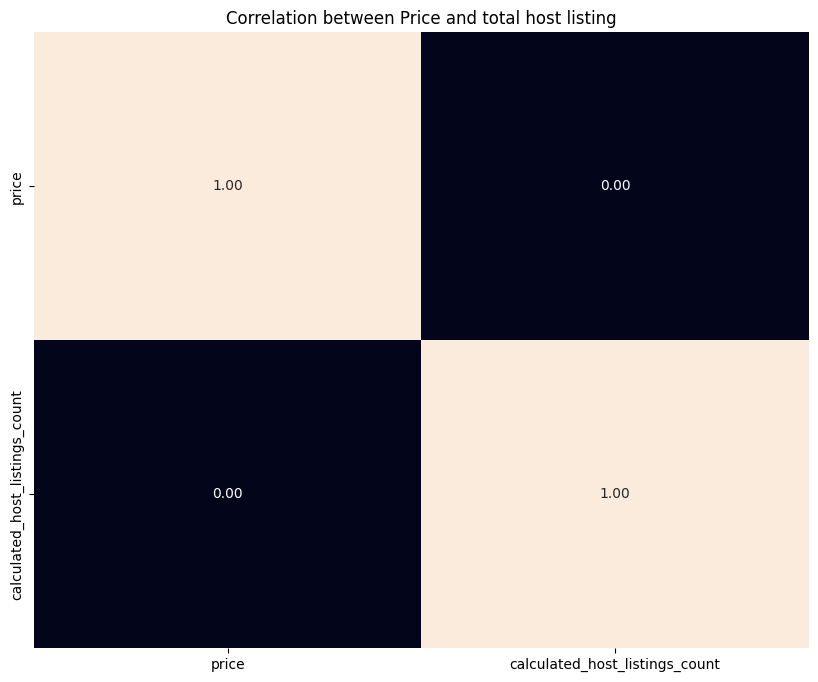

In [138]:
plt.figure(figsize=(10, 8))

corr = subset[["price", "calculated_host_listings_count"]].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cbar=False,
)

plt.title('Correlation between Price and total host listing')
plt.show()

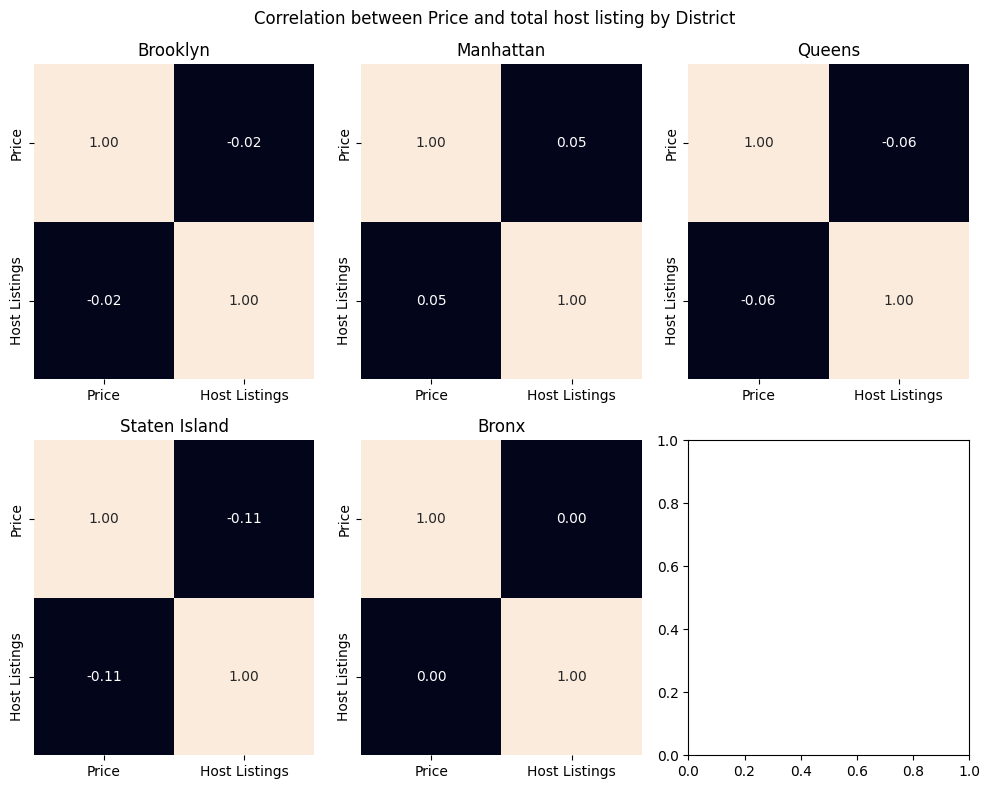

In [139]:
#Correlation price total list by district

fig, axis = plt.subplots(2, 3, figsize=(10, 8))
axis = axis.flatten() 

for i, group in enumerate(groups):
    subset = df[df['neighbourhood_group'] == group]
    
    # correlation matrix
    corr = subset[["price", "calculated_host_listings_count"]].rename(columns={"price": "Price", "calculated_host_listings_count": "Host Listings"}).corr()
    
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cbar=False,
        ax=axis[i],
        
    )
    
    axis[i].set_title(group, fontsize=12)
    axis[i].tick_params(labelsize=10)
    

fig.suptitle('Correlation between Price and total host listing by District')
plt.tight_layout()
plt.show()

It seems not to be correlation between price a total host listing in total neither by district

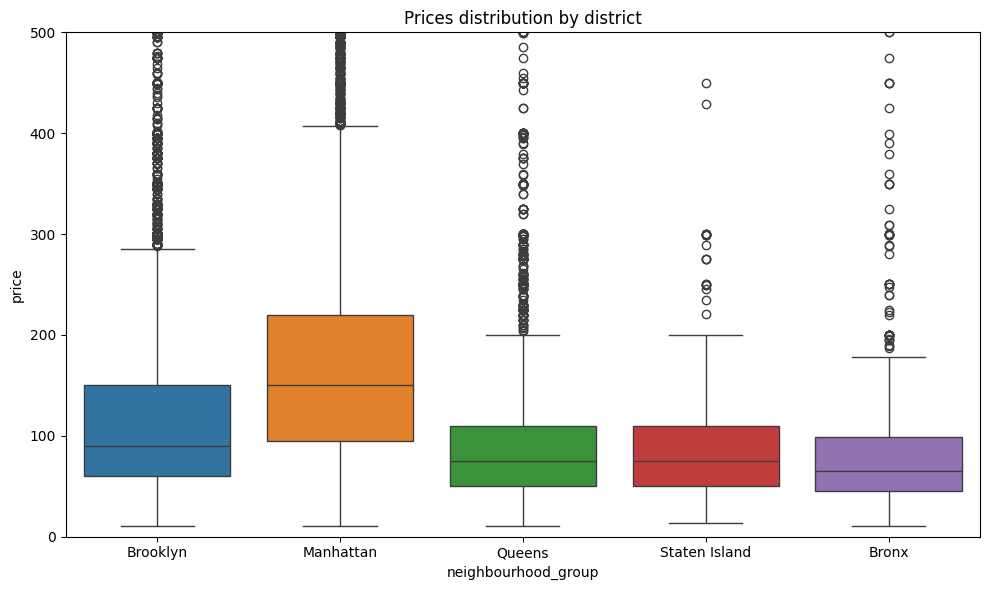

In [140]:
#Price distribution by district

plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'price', hue = 'neighbourhood_group')
plt.title('Prices distribution by district')
plt.ylim(0,500)
plt.tight_layout()
plt.show()


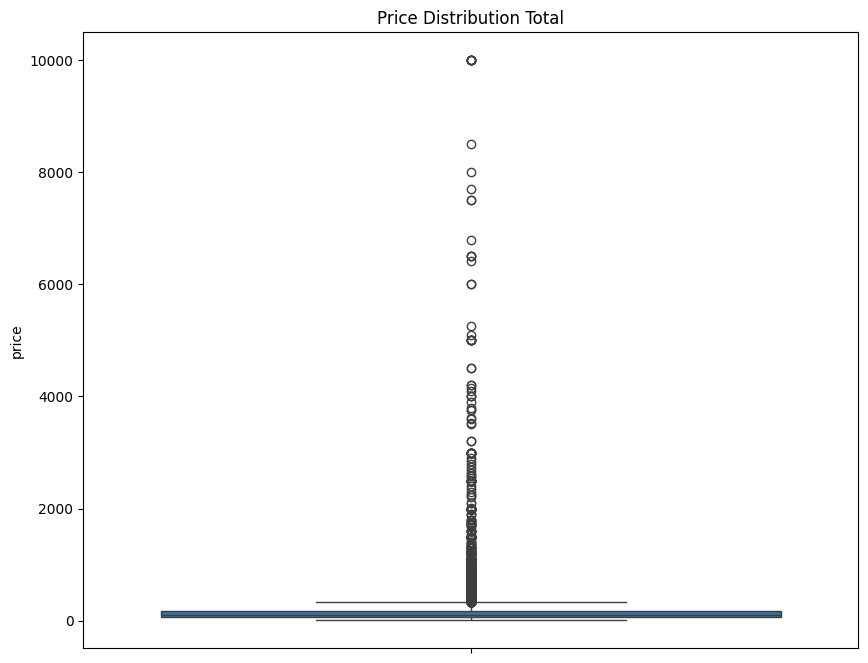

In [141]:
#outliers

plt.figure(figsize=(10 ,8))
sns.boxplot(data = df, y = 'price')

plt.title('Price Distribution Total')
plt.show()

In [142]:
#pairplot to see all data
#sns.pairplot(df, hue='neighbourhood_group')

In [143]:
#change categorical to num and remove categorical data

df['neighbourhood_group_n'], neighbourhood_group_index = pd.factorize(df['neighbourhood_group'])
df['neighbourhood_n'], neighbourhood_index = pd.factorize(df['neighbourhood'])
df['room_type_n'], room_type_index = pd.factorize(df['room_type'])
df = df.drop(['host_id','neighbourhood_group', 'neighbourhood', 'room_type', 'latitude', 'longitude'], axis = 1)
df.tail(10)


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
id,,,,,,,,
36482809,75,2,0,2,353,1,4,0
36483010,200,6,0,1,176,1,1,1
36483152,170,1,0,3,365,0,12,1
36484087,125,4,0,1,31,1,7,0
36484363,65,1,0,2,163,2,46,0
36484665,70,2,0,2,9,0,6,0
36485057,40,4,0,2,36,0,21,0
36485431,115,10,0,1,27,1,2,1
36485609,55,1,0,6,2,1,7,2


In [144]:
#Train test split

X = df.drop('price', axis = 1)
y = df['price'] #price as objetive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
id,,,,,,,
34302031,3,6,1,37,2,46,1
24370692,5,5,1,0,0,12,0
32813862,2,7,1,70,4,65,0
9144999,14,1,1,0,1,14,0
18906081,1,0,4,0,0,16,0


In [145]:
#Scaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

In [146]:
#Creates csv to store clean data and index for categorical data

df.to_csv('../data/processed/clean_data.csv', index =True)

#index to restore categorical data 
pd.DataFrame({'neighbourhood_group': neighbourhood_group_index}).to_csv('../data/processed/neighbourhood_group_index.csv', index_label='code')
pd.DataFrame({'neighbourhood': neighbourhood_index}).to_csv('../data/processed/neighbourhood_index.csv', index_label='code')
pd.DataFrame({'room_type': room_type_index}).to_csv('../data/processed/room_type_index.csv', index_label='code')


In [147]:
#Creates csv for train and test sets

X_train_scaled.to_csv('../data/interim/X_train_scaled.csv')
X_test_scaled.to_csv('../data/interim/X_test_scaled.csv')
y_train.to_csv('../data/interim/y_train.csv')
y_test.to_csv('../data/interim/y_test.csv')